## Prisma síntetico para teste no Oasis

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv # pacote de plotagem 3D
import pandas as pd
#############################

from functions import functions as func
from functions import plot_functions as plf
from functions import plot_function_pyvista as plv
from functions import prism

### Grid de pontos onde é calculadao o dado sintético

In [2]:
# numero de pontos ao longo de x e y 
shape = (50, 50)

# Oeste, Leste, Sul, Norte
area = [-5000, 5000, -5000, 6000]

# Coordenadas no sistema topocentrico 
y = np.linspace(area[0], area[1], shape[0])
x = np.linspace(area[2], area[3], shape[1])
y, x = np.meshgrid(y, x)
y = np.ravel(y)
x = np.ravel(x)
z = np.zeros_like(y) -150

coordinates = np.vstack([y, x, z])
coordinates.shape

### Cria modelo formado por prismas

In [17]:
# prismas = [Oeste, Leste, Sul, Norte, Topo, Base]
prismas = np.array([[2000., 3000., -1500., -500.,10.,200.],
                    [1600., 2600., -2500., -1500.,10.,200.], 
                    [-5000., 5000., 1500., 2500.,10.,200.],
                    [-3000., -2000., -4000., 1500.,10.,200.]])

### Magnetização de cada prisma a primeira, segunda e terceira colunas contêm a intensidade de magnetização (em nT), inclinação e declinação (em graus) das fontes simuladas (prismas)

In [18]:
magnetization = np.array([[1.4, 30, -10],
                          [1.3, 30, -10],
                          [1.1, 60, 40],
                          [1.2, -20, -75]])

### Campo geomagnético principal sintético

In [19]:
# ponto de referencia
yc, xc = 0, 1000

# inclinação (graus)
I0 = 20 + 1e-4*(x-xc) + 3e-4*(y-yc) + 1e-8*(x-xc)*(x-xc) + 1e-8*(y-yc)*(y-yc)

# declinação (graus)
D0 = -43 + 6e-5*(x-xc) + 1e-4*(y-yc) + 3e-9*(x-xc)*(x-xc) + 4e-9*(y-yc)*(y-yc)

# intensidade (nT)
F0 = 23400+ 1e-4*(x-xc) + 1e-4*(y-yc) + 0*(x-xc)*(x-xc) + 0*(y-yc)*(y-yc)

# Componetes cartesianas do campo principal
cosI0 = np.cos(np.deg2rad(I0))
sinI0 = np.sin(np.deg2rad(I0))
cosD0 = np.cos(np.deg2rad(D0))
sinD0 = np.sin(np.deg2rad(D0))
Fx = F0*cosI0*cosD0
Fy = F0*cosI0*sinD0
Fz = F0*sinI0

### Plot da inclinação, declinação e intensidade do campo geomagnético principal sintético

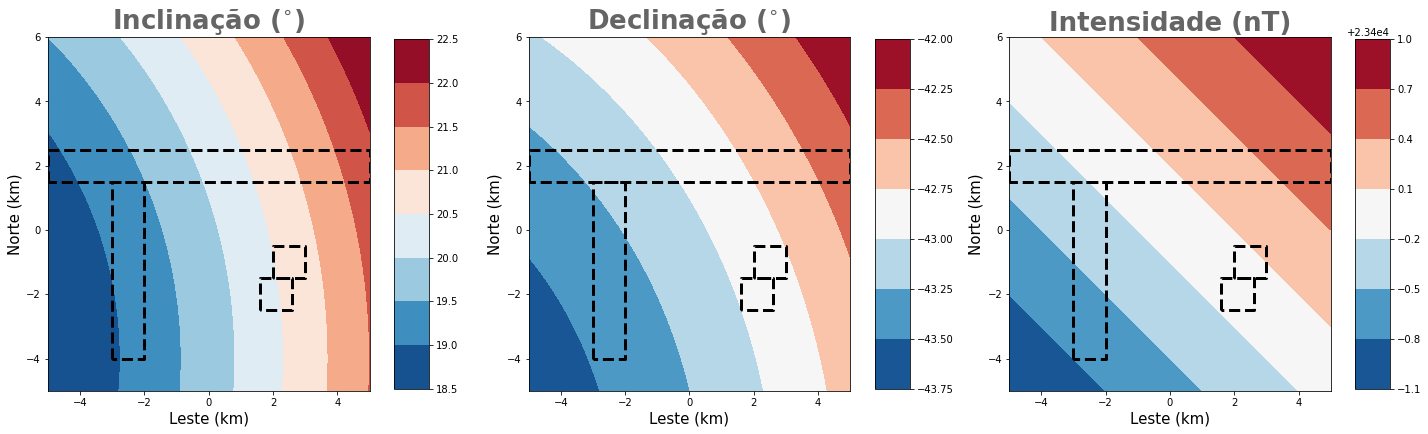

In [20]:
fields = [I0, D0, F0]
windows = [1, 2, 3]
titles = ['Inclinação ($^{\circ}$)', 'Declinação ($^{\circ}$)', 'Intensidade (nT)']

plt.figure(figsize=(20,10))

for w, window in enumerate(windows):

    plt.subplot(1,3,window)
    plt.title(titles[w], fontsize=26,weight='bold', alpha=.6)
    plt.axis('scaled')
    plt.contourf(y.reshape(shape)*0.001, 
                 x.reshape(shape)*0.001, 
                 fields[w].reshape(shape), cmap='RdBu_r')
    plt.colorbar(shrink=0.5, pad=0.06, aspect=10)
    plf.model_boundaries_2(prismas, m2km=True,linewidth = 3)
    plt.xlim(0.001*area[0], 0.001*area[1])
    plt.ylim(0.001*area[2], 0.001*area[3])
    plt.xlabel('Leste (km)', fontsize=15)
    plt.ylabel('Norte (km)', fontsize=15)

plt.tight_layout()

plt.show()

# _Dados Sintéticos_

In [21]:
# Calcula as componentes do campo magnético produzido pelas fontes simuladas (prismas)
bx = prism.mag(coordinates=coordinates, prisms=prismas, magnetization=magnetization, field='b_x')
by = prism.mag(coordinates=coordinates, prisms=prismas, magnetization=magnetization, field='b_y')
bz = prism.mag(coordinates=coordinates, prisms=prismas, magnetization=magnetization, field='b_z')


In [ ]:
# Anomalia de campo total dos dados sitéticos
tfa = np.sqrt((Fx+bx)**2 + (Fy+by)**2 + (Fz+bz)**2) - F0

## Criei uma matriz transposta para colocar as linhas como colunas
### - Em segui a transformei em _DataFrame_ para usar a função do _Pandas_ **.to_csv**
### - Por fim, desta etapa, salvei em _.XYZ_

In [78]:
coorT=np.vstack([y, x, z]).T
df = pd.DataFrame(tfa)
df.to_csv('CampoTotal.XYZ', index=False)

##  Separei-a em 3 coordenas _xyz_ da transposta
### - Chamei através do _pandas_ para dessa forma adicionar as 3 componentes no arquivo salvo
### - E por fim salvar no arquivo final

In [92]:
cor=pd.DataFrame(coorT)
coory = cor[0]
coorx = cor[1]
coorz = cor[2]

CmT=pd.read_csv('CampoTotal.XYZ')
tbl = CmT.assign(Y =coory,X = coorx,Z = coorz)

tbl.to_csv('CampoTotal.XYZ', index= False)